# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 15.3 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.1 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 24.10.1 requires

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
data.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 1898 rows and 9 columns.


#### Observations: The data set has 1898 rows and 9 columns in total


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 4 columns of integer value. The columns are order_id,customer_id, food_preparation_time and delivery_time. There is 1 float type the cost_of_the_order and 4 string typle columns restaurant_name, cuisine_type,day_of_the_week and rating.



### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
# replacing vakues with NaN
data['rating'] = data['rating'].replace(['Not given'],np.nan)
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations: As per the above code there seem to be no null values. However, the ratings columns is supposed to be an integer column and some records in this observation are string values as per our analysis of head and tail of the dataset, therefore converting it to Object column type. The replace funtion has been used to replace the value 'Not given" to NaN.




In [ ]:
# changing the data type to float as after replacing with NaN conversion to int is not allowed
data['rating'] = data['rating'].astype(float)
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Food preparation time : The minimum food prep time is 20 mins, avg being 27.37 mins and maximum being 35 mins.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
data_new =  pd.read_csv('/content/drive/MyDrive/University of Texas - Austin - Artificial Intelligence and Machine Learning/Project-PythonFoundations_FoodHub/foodhub_order.csv')

In [ ]:
data_new.rating.value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:
 Out of the total rows in the data set about 736 order have not been rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Write the code here
# Analysis on Order_id
data['order_id'].nunique()

1898

#### Observations:
There are 1898 unique orders

In [ ]:
#Analysis on Customer_id
data['customer_id'].nunique()

1200

#### Observations:
There are 1200 unqiue customers

In [ ]:
#Analysis on the categorical column restaurant name. Finding the number of unique restaurants
data['restaurant_name'].nunique()

178

####Observation :
There are about 178 unique restaurants. Since this column is categorical and that there are 178 restaurants it would be easier to look at how many unique restuarants are present vs the counts of the restaurants on a count plot. We do not have the location information to count the restaurants by name either.

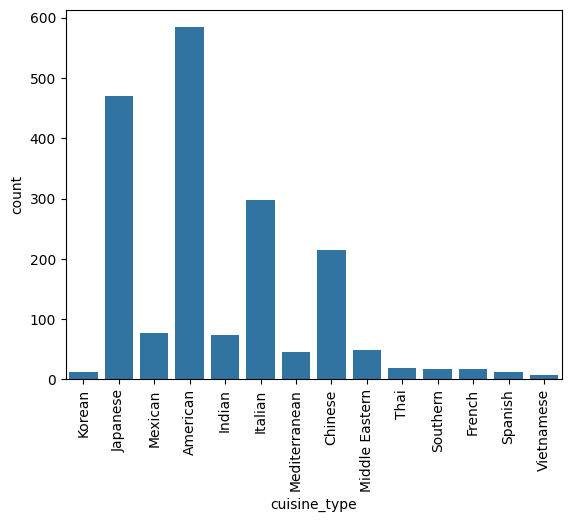

In [ ]:
#Analysis on categorical column cuisine_type. There could be various restaurants with the cuisine type and therefore, we could do a count plot
sns.countplot(data=data,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()



#### Observation:
American cuisine seems to be the most popular cuisine followed by Japanese and Korean.

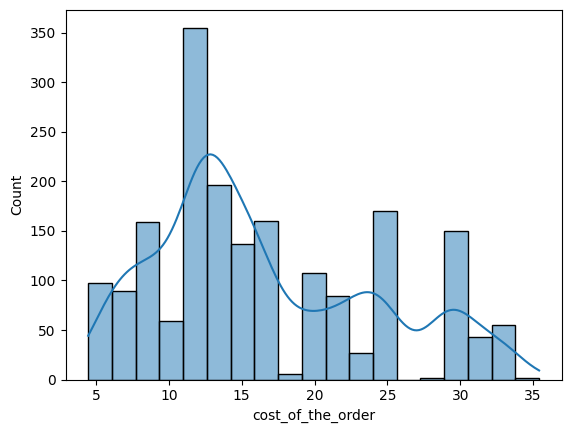

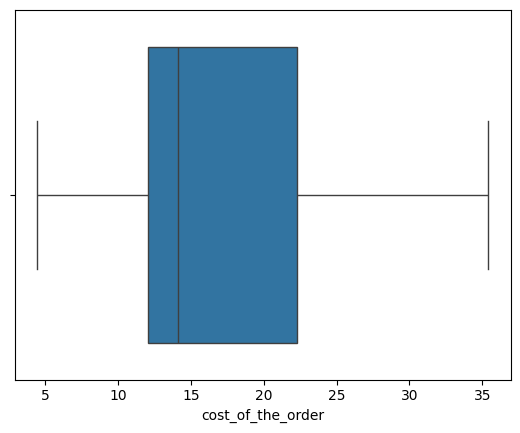

In [ ]:
#Analysing the cost of order variable which is float using histogram and boxplot

sns.histplot(data=data, x='cost_of_the_order', kde = True)
plt.show()
sns.boxplot(data=data, x='cost_of_the_order')
plt.show()

#### observation:

The minimum cost of order is less than 5. The median is about 14 and maximum is 35 currency units. The 25th percentile of the order cost between 10 and 12. 75th percentile of orders cost between 20 and 15 currency units

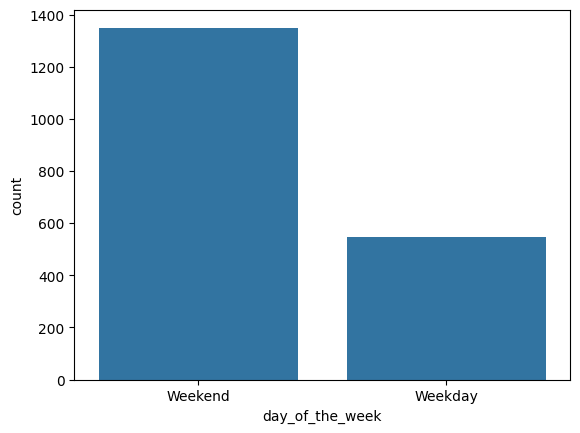

In [ ]:
# Analysing day_of_the_week column which is of string type. Using countplot for the analysis.
sns.countplot(data=data , x='day_of_the_week')
plt.show()

#### Observation:

The above plot indicates there are more orders on the weekends than on the weekdays.

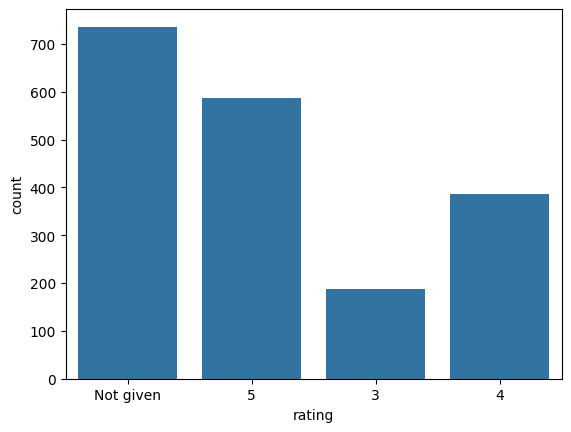

In [ ]:
#Analysing the ratings using count plot. Using the data_new dataframe instead of Data dataframe
sns.countplot(data= data_new , x='rating')
plt.show()

#### Observation-
There are more 5 star ratings than ratings 4 and 3. There are about 700+ orders that are not rated. These constitute approximately 38% of the orders

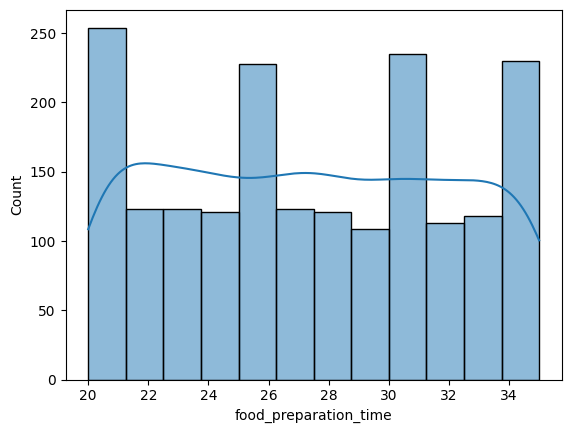

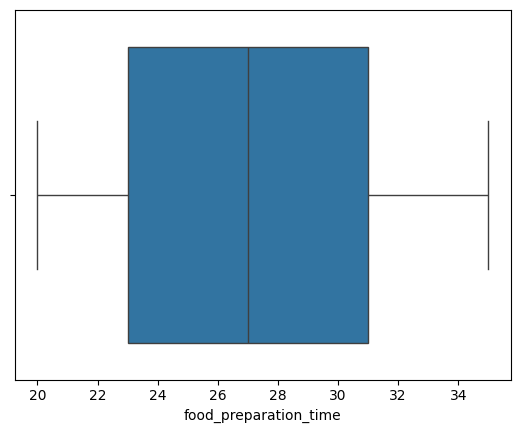

In [ ]:
# Analyzing the column food_preparation_time. This is a int value in minutes. Usually time is float and is a continuous value. Using the histplot and boxplot for analysis.

sns.histplot(data=data, x='food_preparation_time', kde = True)
plt.show()
sns.boxplot(data=data, x='food_preparation_time')
plt.show()

#### observations-

With a univariate analysis it is usually difficult to indicate a correlation of some sort for food preparation time. However,  

The 50th percentile is at 27 mins, 25th perentile is at 23 mins and 75th percentile is at 31 mins. The lowest time taken for food prep is at 20 mins and highest is at 35 mins.

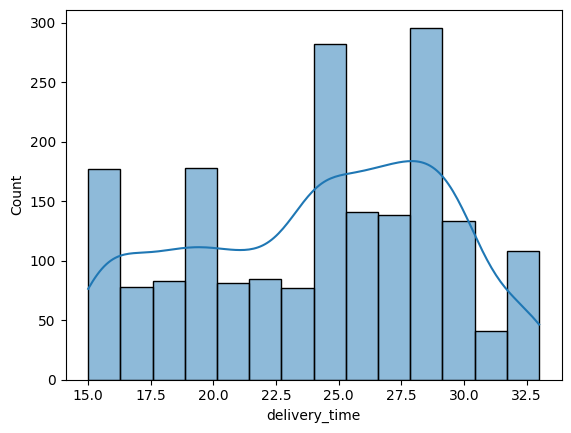

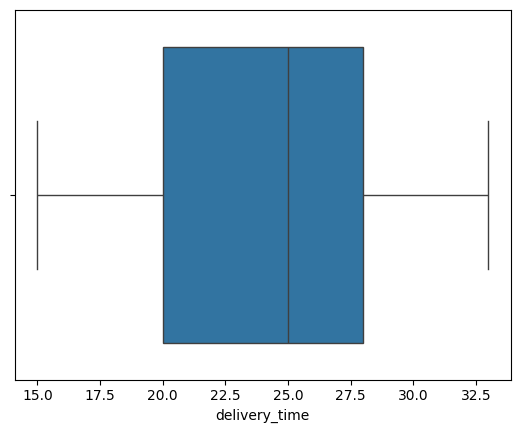

In [ ]:
# Analysis on Delivery time variable using hist and box plots.
sns.histplot(data=data, x='delivery_time', kde = True)
plt.show()
sns.boxplot(data=data, x='delivery_time')
plt.show()

#### Observations-

the median time to deliver is at 25 mins and maximum is at approximately 33 mins. Minimum time it took to deliver an order is about 15 mins.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
data.restaurant_name.value_counts()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1


#### Observations:
 Top 5 restaurants based on the orders received are Shake Shack, The meatball Shop, blue ribbon sushi, blue ribbon fried chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
data[data['day_of_the_week']== 'Weekend'].cuisine_type.value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:
 American cuisine is the most popular cuisine on the weekend

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
dataf = data[data['cost_of_the_order'] > 20.0].shape[0]/data.shape[0]
percentdata = dataf*100
print(round(percentdata, 2),'%')


29.24 %


#### Observations:
percentage of orders that cost more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
datamean = round(data['delivery_time'].mean(),2)
print(datamean, 'minutes')

24.16 minutes


#### Observations:
mean delivery time is 24 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
data['customer_id'].value_counts()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7
...,...
385426,1
254913,1
289597,1


#### Observations: The top three customers are 52832 who has 13 orders, 47440 with 10 orders and 83287 with 9 orders who will receive the 20% discount code.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<Axes: >

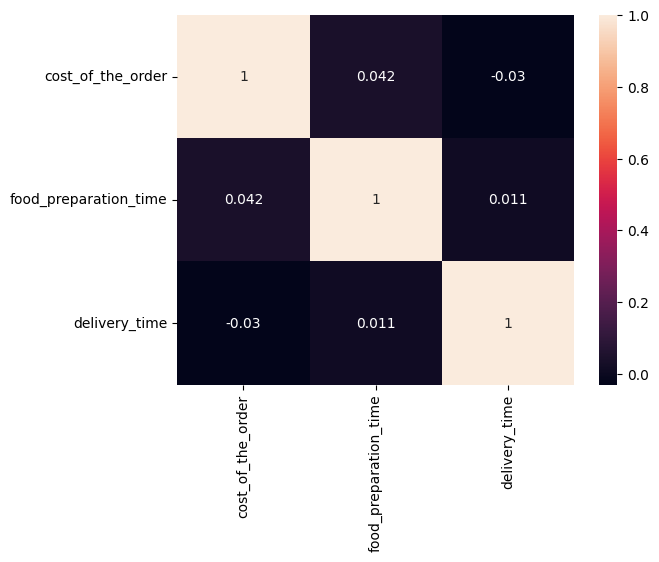

In [ ]:
# Write the code here
# Analysis 1. With the numerical variables cost of order, food prep time and delivery time

sns.heatmap( data = data_new[['cost_of_the_order','food_preparation_time','delivery_time']].corr(numeric_only=True),annot=True)



#### Observation-
There is no correlation between any of the numeric variables as all the values are near 0

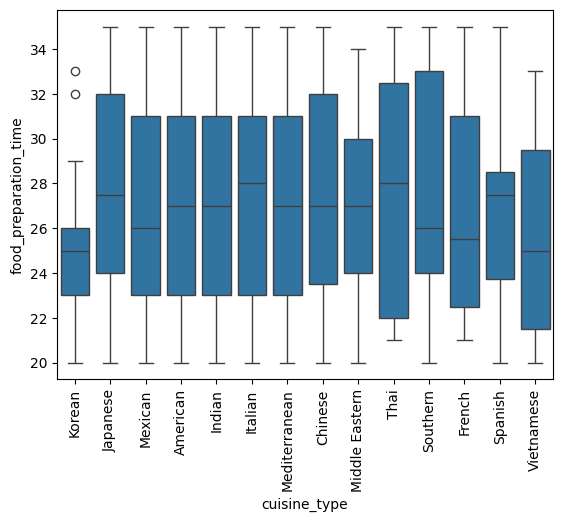

In [ ]:
# Analysis 2. With Numeric and Categorical variables - cuisine type and food_prep_time
sns.boxplot(data=data_new, x='cuisine_type', y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

#### Observation -
 1. The above plot showcases that Korean cuisine takes anywhere between 20 to 29 mins to get prepared. The median prep time however is observed to be lesser than most cuisines.
 2. Median prep time of most of cusines area around 27 minutes or under except for Italian, Thai and Spanish which takes roughly 28 mins.
 3. Thai cuisine has a lot of spread in terms of the amount of time it takes. Its 25th percentile is at 23 mins while its 75th percentile is at 33 mins.

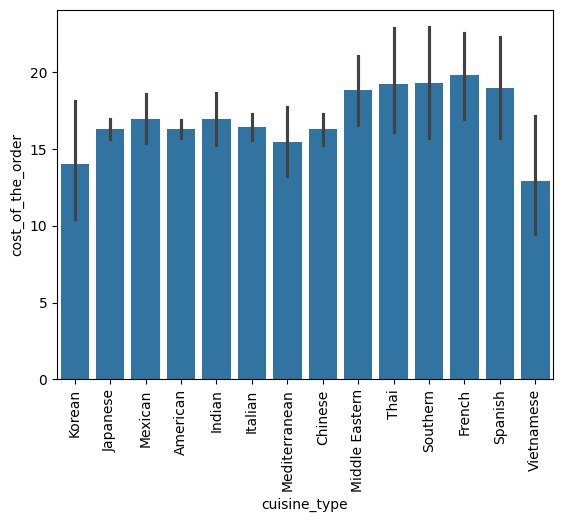

In [ ]:
# Analysis 3 - With Numeric and Categorical variable - Cost of order and Cuisine Type

sns.barplot(data=data_new, x='cuisine_type', y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

#### Observation-
The most expensive cuisine is French while Vietnamese is moderatly priced at around 13 dollars.

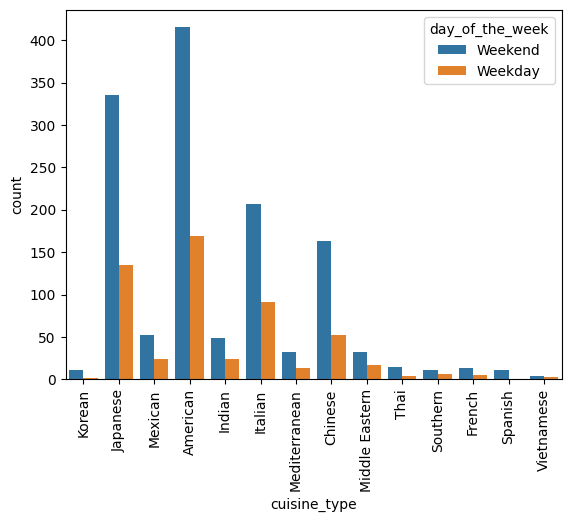

In [ ]:
#Analysis 4 - With Categorical variables Cuisine type and Day of the week

sns.countplot(data=data_new, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Observation-

Generally there are more orders during the weekends than the weekends. With Americal cuisine being the most ordered on Weekends and Vietnamese being the least.

On the weekdays, American cuisine still has the highest orders and Korean the lowest.

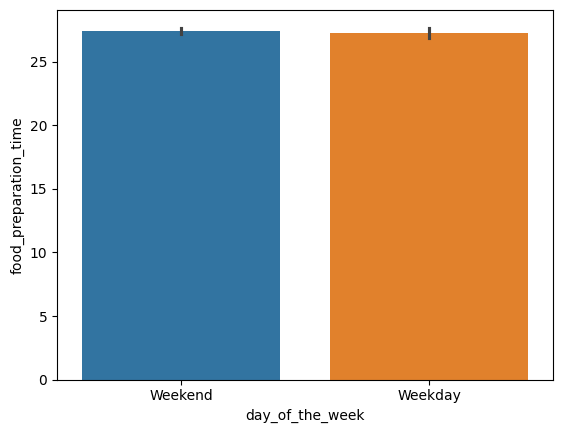

In [ ]:
# Analysis 5 - With Numerical and Categorical variable -Food prep time and Days of the week

sns.barplot(x="day_of_the_week", y="food_preparation_time", data=data_new, hue="day_of_the_week")
plt.show()

#### Observation-

There is no difference in the food preparation time for weekend and weekdays

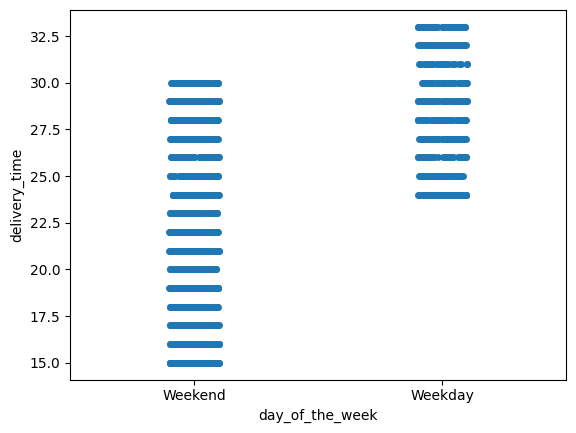

In [ ]:
# Analysis 6 - With Numerical and Categorical variable -Delivery time and Days of the week

sns.stripplot(x="day_of_the_week", y="delivery_time", data=data_new, jitter=True)
plt.show()

#### Observation-

The Delivery Time is faster on the Weekend and ranges anywhere between 15 mins to 30 mins. Delivery times are slightly longer on Weekdays starting from 24 minutes to 33 mins.

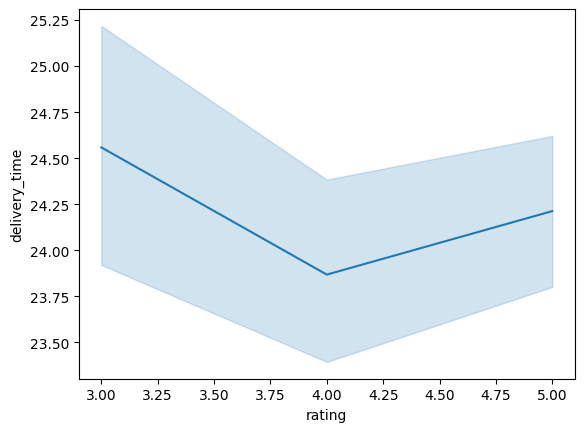

In [ ]:
# Analysis 7 - With Numeric variables - Delivery Time and Rating

sns.lineplot(data=data, x="rating", y="delivery_time")
plt.show()

#### Observation-
1. For rating 3.00 the delivery times have been observed to ve at 24.65 minutes.
2. For rating 4.00 the delivery times have been observed to be lower at approximately 23.85 to 23.90
3. for rating 5.00 the delivery times are at 24.25.

In general it is difficult to conclude that delivery times influence the rating provided by the customers on the orders.

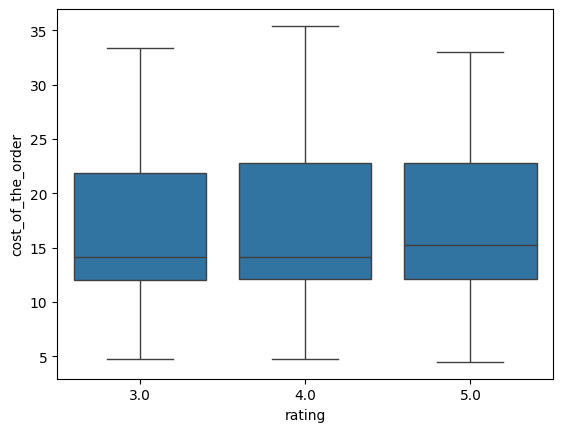

In [ ]:
# Analysis 8 - With numeric variables - Rating and cost of order. dataframe 'data' does not have the rating Not given where dataframe 'data_new' has the 'not given' rating. Using rating sans 'not given'
sns.boxplot(data=data, x="rating", y="cost_of_the_order")
plt.show()


### Observation-

The median cost of the orders is not significantly different for the different ratings, indicating there is no correlation between cost of the orders and ratings. In conclusion, ratings are not based on how expensive or cheap the meal is.

<ipython-input-177-3ea1295f1731>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x="cuisine_type", y="rating", ci=None)


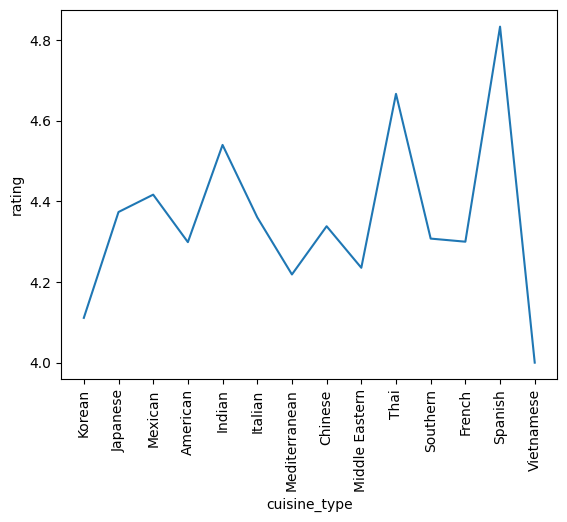

In [ ]:
# Analysis 9 - With Numeric and Categorical variable - Rating and Cuisine type

sns.lineplot(data=data, x="cuisine_type", y="rating", ci=None)
plt.xticks(rotation=90)
plt.show()

### Observation-

The spanish cuisine is rated the highest while Vietnamese is rated the lowest. The lower rating for the Vietnamese cuisine can also be attributed to the low orders the cuisine type has seen in general.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# Step 1 - Filter orders where there is ratings given and copy into data_rate dataframe
df = data_new[data_new['rating'] != 'Not given'].copy()
df.info()
# Step 2 - Convert the rating column in the new dataframe as int. This will help us will calc like mean()
df['rating'] = df['rating'].astype('int')
# Step 3 - Dataframe that has restaurants with their rating counts
df_rating_count = df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending=False).reset_index()
df_rating_count.info()
df_rating_count.head()







<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 90.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   restaurant_name  156 non-null    object
 1   rating           156

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Step 4 - Get restaurants having rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
rest_names.info()
#Step 5 - Filter the data to get restaurants that have rating more than 50
df_mean_4 = df[df['restaurant_name'].isin(rest_names)].copy()
df_mean_4.info()
#Step 6 - Find mean rating of restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()


<class 'pandas.core.series.Series'>
Index: 4 entries, 0 to 3
Series name: restaurant_name
Non-Null Count  Dtype 
--------------  ----- 
4 non-null      object
dtypes: object(1)
memory usage: 64.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 3 to 1888
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               354 non-null    int64  
 1   customer_id            354 non-null    int64  
 2   restaurant_name        354 non-null    object 
 3   cuisine_type           354 non-null    object 
 4   cost_of_the_order      354 non-null    float64
 5   day_of_the_week        354 non-null    object 
 6   rating                 354 non-null    int64  
 7   food_preparation_time  354 non-null    int64  
 8   delivery_time          354 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 27.7+ KB


,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:
restaurants fulfilling the crtierias are - 1. The meatball shop 2. Blue Ribbon Friedn Chicken 3. Shake Shack 4. Blue Ribbon Sushi

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
def net_revenue(ord):
  if ord > 20 :
    return ord*0.25
  if ord > 5 :
    return ord*0.15
  else :
    return ord*0

data_new['net_revenue']= data_new['cost_of_the_order'].apply(net_revenue)
data_new.head()
net_revenue_sum = data_new['net_revenue'].sum()
print(net_revenue_sum)

6166.303


#### Observations:
Total Net Revenue generated by the company across all orders is 6166.303 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
data_new['total_time'] = data_new['food_preparation_time']+ data_new['delivery_time']
data_new.head()

orderpercent_60 = round((data_new[data_new['total_time']>60].shape[0]/data_new.shape[0])*100,2)
orderpercent_60

10.54

#### Observations:

About 10.54% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
delivery_time = data_new.groupby(data_new['day_of_the_week'])['delivery_time'].mean()
delivery_time

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
The mean delivery time on Weekday is 28 mins and on Weekend is 22 mins.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There are 1898 rows and 9 columns.
*  Food preparation time : The minimum food prep time is 20 mins, avg being 27.37 mins and maximum being 35 mins.
* There are 1200 unqiue customers
* There are about 178 unique restaurants
* The minimum cost of order is less than 5. The median is about 14 and maximum is 35 currency units. The 25th percentile of the order cost between 10 and 12. 75th percentile of orders cost between 20 and 15 currency units
* About 29% of orders cost more than 20 dollars
* There are no 1 or 2 star rating available. There are more 5 star ratings than ratings 4 and 3. There are about 736 orders that are not rated. These constitute approximately 38% of the orders
* There is no correlation between any of the numeric variables as cost of the order, prep time and delivery time.
* The median prep time of Korean cuisine is observed to be lesser than most cuisines.Thai cuisine has a lot of spread in terms of the amount of time it takes. Its 25th percentile is at 23 mins while its 75th percentile is at 33 mins.
* Generally there are more orders during the weekends than the weekends. With Americal cuisine being the most ordered on Weekends and Vietnamese being the least. On the weekdays, American cuisine still has the highest orders and Korean the lowest. Shake Shack the american chain recieved the highest total orders.
* The spanish cuisine is rated the highest while Vietnamese is rated the lowest. The lower rating for the Vietnamese cuisine can also be attributed to the low orders the cuisine type has seen in general.






#### Recommendations -

* There could be more emphasis on increasing discounts on cuisines during weekdays increasing orders on weekdays like on the weekends.
* There could be more delivery personal on weekdays to do speedy delivery.
* There could be a better UI/Client for rating the orders. May be incentivize customers to provide rating in order to avoid nulls or ratings not given scenarios.
* There could be more effecive discounts provided in order to increase the number of order thus having a positive effect on the overall revenue without hurting customers and providers.
* There could be more fields in the Client UI for collecting more data like location and its impact on delivery times, cuisine preference etc.

---